# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment5 using this file format:</u> <b>Yourfirstname_lastname_Assignment5.ipynb. Marks might be deducted if you do not follow the submission steps.</b> 

#### <b>Deadline</b>: <u>Dec-4-2020 11:59 PM.</u>

# Assignment 5 

## (This assignment is optional for undergradaute students with extra credits, 3 points out of 100). 


### Getting started: Installing Numpy, Keras and TensorFlow

Keras is a high-level Python API that allows you to easily construct, train, and apply neural networks.
However, Keras is not a neural network library itself and depends on one of several neural network backends. We will use the Tensorflow backend. TensorFlow is an open-source library for neural networks (and other mathematical models based on sequences of matrix and tensor computations), originally developed by Google.Also, Keras uses numpy data structures. 

In the recent tensorflow version 2.0, Google merged Keras in tensorflow. So, if you are using tensorflow version 2.0 or better there will be a slightly change in the syntax for importing the functions or modules. One good resource is to go to the tensorflow documentation and look for the syntax. The link is https://www.tensorflow.org/guide/effective_tf2. 

Installing Numpy, TensorFlow and Keras: 

We suggest that you use the Python package management system pip. 
On most systems, the following commands will work:

- $ pip install numpy matplotlib.

- $ pip install tensorflow

- $ pip install keras

### OR Using Anaconda (Easy and Prefered)

- $ conda install keras scikit-learn pandas

- $ conda install tensorflow

<b> Note:It is highly recommended that you use tensorflow version 2.0 or better as this assignment will be following 2.0 version. <b> 

Note that this will likely install the CPU version of TensorFlow that does not use the GPU to speed up neural network training. For this assignment, training on the CPU will be sufficient, but if your computer has a GPU (or you want to try running the assignment in the cloud), follow the installation instructions on the tensorflow page. 

If you get stuck during the installation, you can find installation instructions for each package here: 

- Tensorflow: https://www.tensorflow.org/install/ 
- Keras: https://keras.io/#installation 

<b> Note: You don't need to install keras separately if you are using tensorflow version 2.0 or better as it will be in tensorflow. <b>

<b>It is highly recommend that </b> you read and run these tutorials before you start this assignment. 
- https://www.tensorflow.org/tutorials/keras/classification

- https://www.tensorflow.org/tutorials/images/cnn 

 
 
 


## Assignment 1 -- Part 1

### Introduction
In this assignment you will use the Keras Neural Network API for Python to build neural networks for image classification. 


#### Data Set

We will work on the CIFAR-10 image data set  described here: https://www.cs.toronto.edu/~kriz/cifar.html.

The data set contains 60.000 images labeled with 10 different categories:

Numeric ID	Category Name
- 0	airplane
- 1	automobile
- 2	bird
- 3	cat
- 4	deer
- 5	dog
- 6	frog
- 7	horse
- 8	ship
- 9	truck


Each image is 32x32 pixels large and there are three color channels (red, green blue). Each image can therefore be represented as three 32x32 matrices or one 32x32x3 cube.


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import callbacks
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


### Part 1, Q1 - Loading the CIFAR-10 Data --  [10 pts]

The following code fragment imports the CIFAR-10 data using Keras. 

In [2]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

In [3]:
print(xtrain.shape)
print(ytrain.shape)

(50000, 32, 32, 3)
(50000, 1)


In [4]:
print(xtest.shape)
print(ytest.shape)

(10000, 32, 32, 3)
(10000, 1)


Split the training data into training, testing and validation (40000 for training,10000 for testing and 10000 for validation). Thus you have xtrain, ytrain, xvalid, yvalid, xtest, and ytest as numpy n-dimension arrays contains the training validation and testing data.

The input training data (xtrain) is a 4-dimensional array containing 40000 images, each of them a 32x32x3 tensor. Numpy arrays can be indexed like nested Python lists, so xtrain[0] will give you the first 32x32x3 image.

The input label (ytrain) is a vector containing the numeric class for each image (see table above for what the numeric IDs mean). For example, xtrain[0] is an image of a frog and therefore ytrain[0] contains the value 6. 

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval= train_test_split(xtrain, ytrain, test_size=0.2)

## Visualizing Images
If you want to take a look at the individual images, you can do so using matplotlib (this step is optional). 

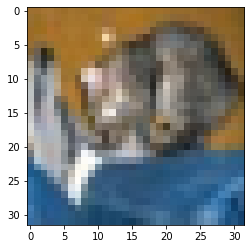

In [6]:
plt.imshow(xtest[0])



The output layer of the neural networks we will train will contain 10 neurons corresponding to the 10 classes. The classifier predicts the class whose corresponding neuron has the highest activation. We need to convert the numeric indices for each image into a 1-hot vector of length 10, so that for class label n the n-th element is 1 and all other elements are 0. For example, if the class label is 6, we should get the 1-hot vector [0 0 0 0 0 0 1 0 0 0].
The class labels for the entire training and set should then be represented as a 40000x10 matrix, and the testing data as a 10000x10 matrix (there are 10k test images). 

Write the function load_cifar10(), which should load the cifar-10 data as described above and should return 6 numpy arrays xtrain, ytrain_1hot, xval, yval_1hot, xtest, ytest_1hot. Your function should convert the y arrays into the 1-hot representation. You can either do this using loops (slow), using numpy fancy indexing (see numpy documentation), or by using appropriate functions in the numpy or Keras API. 

Your function should also do the following normalization on the data. The R,G and B values for each pixel range between 0 and 255. Before returning the training data, normalize it so that these value range between 0.0 and 1.0.
This part is done for you.

In [7]:
from keras.utils import to_categorical
def load_cifar10():
    ''' '''    
    (xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
    xtrain = xtrain/255
    xtest = xtest/255

    ytrain_1hot = to_categorical(ytrain)
    ytest_1hot = to_categorical(ytest)
    xtrain, xval, ytrain_1hot, yval_1hot = train_test_split(xtrain, ytrain_1hot, test_size=0.2, random_state=42)
    return xtrain, xval, xtest, ytrain_1hot, yval_1hot, ytest_1hot
    
    return xtrain, xval, xtest, ytrain_1hot, yval_1hot, ytest_1hot

xtrain, xval, xtest, ytrain_1hot, yval_1hot, ytest_1hot = load_cifar10()

### Check shapes

In [8]:
print(xtrain.shape)
print(ytrain_1hot.shape)

(40000, 32, 32, 3)
(40000, 10)


In [9]:
print(xval.shape)
print(yval_1hot.shape)

(10000, 32, 32, 3)
(10000, 10)


In [10]:
print(xtest.shape)
print(ytest_1hot.shape)

(10000, 32, 32, 3)
(10000, 10)


### Check one-hot encoding

In [11]:
ytrain_1hot[0], yval_1hot[1], ytest_1hot[2]
xtest[0].shape

(32, 32, 3)

### Part 1, Q2  --  [10 pts]

In this task, you will implement a MLP network using keras.Sequential method with:

- Batch size: 16. 
- Number of hidden layers: 1 (100 neuron).
- use SGD optimizer, Learning Rate: 0.01.
- #of epochs 10.
- Use softmax layer for your output.
- use Relu as your activation function.

Keep all other hyperparameters (activation function, etc.) at their default settings.


Find the performance (accuracy) of your model on the validation set and test set after training for 10 epochs.


In [12]:
epochs = 10

model = Sequential([
    layers.Flatten(input_shape=xtest[0].shape),
    layers.Dense(100),
    layers.Activation('relu'),
    layers.Dense(10),
    layers.Activation('softmax')
])

opt = optimizers.SGD(lr=0.01)

model.compile(
	optimizer=opt,
	loss="categorical_crossentropy",
	metrics=['accuracy']
)

history = model.fit(
	x=xtrain,
	y=ytrain_1hot,
    epochs=epochs,
    batch_size=16,
    validation_data=(xval, yval_1hot)
)

Epoch 1/10
2500/2500 [==============================] - 4s 2ms/step - loss: 1.8927 - accuracy: 0.3221 - val_loss: 1.7941 - val_accuracy: 0.3528
Epoch 2/10
2500/2500 [==============================] - 4s 1ms/step - loss: 1.7153 - accuracy: 0.3920 - val_loss: 1.7009 - val_accuracy: 0.3940
Epoch 3/10
2500/2500 [==============================] - 4s 1ms/step - loss: 1.6441 - accuracy: 0.4195 - val_loss: 1.6327 - val_accuracy: 0.4132
Epoch 4/10
2500/2500 [==============================] - 4s 1ms/step - loss: 1.5956 - accuracy: 0.4360 - val_loss: 1.5831 - val_accuracy: 0.4391
Epoch 5/10
2500/2500 [==============================] - 4s 1ms/step - loss: 1.5576 - accuracy: 0.4534 - val_loss: 1.5823 - val_accuracy: 0.4383
Epoch 6/10
2500/2500 [==============================] - 4s 1ms/step - loss: 1.5277 - accuracy: 0.4599 - val_loss: 1.5535 - val_accuracy: 0.4497
Epoch 7/10
2500/2500 [==============================] - 4s 1ms/step - loss: 1.5000 - accuracy: 0.4721 - val_loss: 1.5521 - val_accuracy:

In [13]:
indH, accuracy = model.evaluate(xval, yval_1hot)
print('Validation Accuracy: ' + str(accuracy))

indH, accuracy = model.evaluate(xtest, ytest_1hot)
print('Test Accuracy: ' + str(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 1.5133 - accuracy: 0.4627
Validation Accuracy: 0.4627000093460083
313/313 [==============================] - 1s 2ms/step - loss: 1.4928 - accuracy: 0.4701
Test Accuracy: 0.4700999855995178


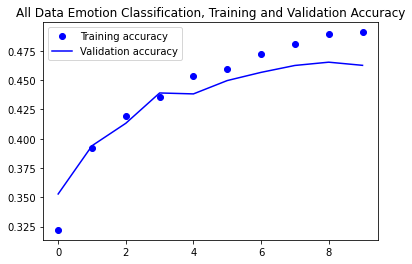

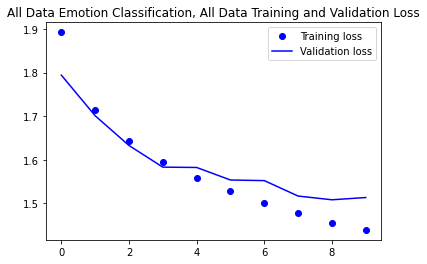

In [14]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('All Data Emotion Classification, Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('All Data Emotion Classification, All Data Training and Validation Loss')
plt.legend()
plt.show()

### Part 1, Q3  --  [10 pts]

How many parameters in the model implemented in b?

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


## 308,310 parameters in model

### Part 1, Q4  --  [10 pts] 

At which epoch your model starts to overfit? Do you think early stopping would be a good solution to avoid overfitting in this case? Give a logical explaination.

In [16]:
epochs = 30
history = model.fit(
	x=xtrain,
	y=ytrain_1hot,
    epochs=epochs,
    batch_size=16,
    validation_data=(xval, yval_1hot)
)

Epoch 1/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.4217 - accuracy: 0.4988 - val_loss: 1.4919 - val_accuracy: 0.4757
Epoch 2/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.4032 - accuracy: 0.5046 - val_loss: 1.4788 - val_accuracy: 0.4787
Epoch 3/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.3878 - accuracy: 0.5103 - val_loss: 1.4856 - val_accuracy: 0.4769
Epoch 4/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.3755 - accuracy: 0.5152 - val_loss: 1.4822 - val_accuracy: 0.4757
Epoch 5/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.3638 - accuracy: 0.5197 - val_loss: 1.4810 - val_accuracy: 0.4670
Epoch 6/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.3499 - accuracy: 0.5232 - val_loss: 1.4786 - val_accuracy: 0.4742
Epoch 7/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.3385 - accuracy: 0.5266 - val_loss: 1.4740 - val_accuracy:

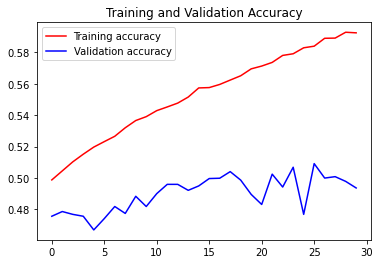

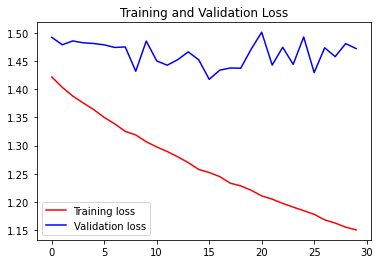

In [17]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Overfitting occurs when training error is decreasing but validation error begins to increase. Based on this definition I would judge that overfitting begins after epoch 10 when the validation accuracy plataus and decreases and increases randomly. Early stopping with low patience would help this algorithim as lower epochs means better validation accuracy in some cases.

### Part 1, Q5  --  [30 pts] 

You must have noticed that one needs to set several parameters—such as the number of hidden layers, the number of neurons in each hidden layer, the non-linearity or activation function to be used, etc. These quantities are known as the hyper-parameters of the network. They need to be specified by the user creating the neural network model.

In this task, you will evaluate the performance of your network for 2 varying values of hyperparameters. Keeping the rest of the values constant (and equal to the default values), adjust the values of parameters as described below. Find the performance (accuracy) of your model on the validation set and plot a trend graph for each of the following.

- Experiment 1:
- Batch size: 32
- Number of hidden layers: 2
- SGD optimizer, Learning Rate: 0.01.
- Use 10 epochs for all the experiments.
- activation function Relu for all the experiments.



- Experiment 2:
- Batch size:64.
- Number of hidden layers: 1.
- SGD optimizer, Learning Rate: 0.001.
- Use 10 epochs for all the experiments.
- activation function Relu for all the experiments.

Use these values to create the most successful model you can (evaluated based on validation scores) and report its accuracy on the test data. Keep all other hyperparameters (number of epochs, activation function, etc.) at their default settings. 

Note: During the experiment, you have to show that you have did the experiments with corresponding results.Plotting the trend graph is must. From all the experiments, then you need to choose the best one to test it and you need to show that too including trend graph.

In [18]:
epochs = 10

# Model for Experiment 1
model1 = Sequential([
    layers.Flatten(input_shape=xtest[0].shape),
    layers.Dense(100),
    layers.Activation('relu'),
    layers.Dense(100),
    layers.Activation('relu'),
    layers.Dense(10),
    layers.Activation('softmax')
])

opt1 = optimizers.SGD(lr=0.01)

model1.compile(
	optimizer=opt1,
	loss="categorical_crossentropy",
	metrics=['accuracy']
)

history1 = model1.fit(
	x=xtrain,
	y=ytrain_1hot,
    epochs=epochs,
    batch_size=32,
    validation_data=(xval, yval_1hot),
    verbose=0
)

In [19]:
# Model for Experiment 2
model2 = Sequential([
    layers.Flatten(input_shape=xtest[0].shape),
    layers.Dense(100),
    layers.Activation('relu'),
    layers.Dense(10),
    layers.Activation('softmax')
])

opt2 = optimizers.SGD(lr=0.001)

model2.compile(
	optimizer=opt2,
	loss="categorical_crossentropy",
	metrics=['accuracy']
)

history2 = model2.fit(
	x=xtrain,
	y=ytrain_1hot,
    epochs=epochs,
    batch_size=64,
    validation_data=(xval, yval_1hot),
    verbose=0
)

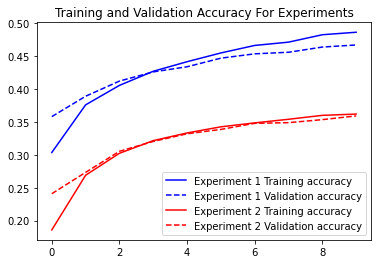

In [20]:
accuracy1 = history1.history['accuracy']
val_accuracy1 = history1.history['val_accuracy']
accuracy2 = history2.history['accuracy']
val_accuracy2 = history2.history['val_accuracy']
epochs = range(len(accuracy1))
plt.plot(epochs, accuracy1, 'b-', label='Experiment 1 Training accuracy')
plt.plot(epochs, val_accuracy1, 'b--', label='Experiment 1 Validation accuracy')
plt.plot(epochs, accuracy2, 'r-', label='Experiment 2 Training accuracy')
plt.plot(epochs, val_accuracy2, 'r--', label='Experiment 2 Validation accuracy')
plt.title('Training and Validation Accuracy For Experiments')
plt.legend(loc='lower right')
plt.show()

In [21]:
indH, accuracy_mlp1 = model1.evaluate(xtest, ytest_1hot)
print('Experiment 1 Test Accuracy: ' + str(accuracy_mlp1))
indH, accuracy_mlp2 = model2.evaluate(xtest, ytest_1hot)
print('Experiment 2 Test Accuracy: ' + str(accuracy_mlp2))

313/313 [==============================] - 0s 2ms/step - loss: 1.4881 - accuracy: 0.4691
Experiment 1 Test Accuracy: 0.4690999984741211
313/313 [==============================] - 1s 2ms/step - loss: 1.8301 - accuracy: 0.3640
Experiment 2 Test Accuracy: 0.36399999260902405


## Experiment 1 outperformed experiment 2 for training, validation, and test accuracy

## Assignment 1 -- Part 2 

In this part you are going to train a convolutional neural network on CIFAR-10  dataset from part 1, refer to part1 to use same training, validation and testing datasets splits. 

 ### Part 2, Q1- Define the model as indicated in the code below. The model is defined as follows:  --  [20 pts]  

- An input that is 32x32x3 dimensional vector.
- Reshape the input as 32x32x3 images (it is a dataset with color images)
- A convolutional layer with 32 filters of shape 12x12x3 and a ReLU non-linearity (with stride (2, 2) and no padding)
- A convolutional layer with 64 filters of shape 5x5x32 and a ReLU non-linearity (with stride (1, 2) and padding to maintain size)
- A max_pooling layer of shape 2x2
- A fully connected layer taking all the outputs of the max_pooling layer to 1024 units and ReLU nonlinearity
- A fully connected layer taking 1024 units to 10 no activation function (the softmax non-linearity will be included in the loss function rather than in the model) 
- Use AdamOptimizer 
- use the Accuracy as your metric... Accuray is simply defined as the fraction of data correctly classified
- initially pick the learning rate to be 0.05 (if this learning rate does not work, pick different learning rate) with decay step of 0.95 every 2000 iterations


write the code to train the model written, train for 15 epochs with a  batch size of 128. 




Hint: start from known architecture then modify the code to match the numbers listed above.

In [22]:
model_cnn1 = Sequential()
model_cnn1.add(layers.Reshape((32,32,3)))

model_cnn1.add(layers.Conv2D(32, (12,12), input_shape=xtest.shape[1:], strides=(2,2), padding='valid'))
model_cnn1.add(layers.Activation('relu'))

model_cnn1.add(layers.Conv2D(64, (5,5), input_shape=xtest.shape[1:], strides=(1,2), padding='same'))
model_cnn1.add(layers.Activation('relu'))

model_cnn1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_cnn1.add(layers.Flatten())

model_cnn1.add(layers.Dense(1024))
model_cnn1.add(layers.Activation('relu'))
model_cnn1.add(layers.Dense(10))
model_cnn1.add(layers.Activation('softmax'))

In [23]:
epochs = 15

opt_cnn1 = optimizers.Adam(lr=0.05, decay=0.95)

model_cnn1.compile(
	optimizer=opt_cnn1,
	loss="categorical_crossentropy",
	metrics=['accuracy']
)

history_cnn1 = model_cnn1.fit(
	x=xtrain,
	y=ytrain_1hot,
    epochs=epochs,
    batch_size=128,
    validation_data=(xval, yval_1hot)
)

Epoch 1/15
313/313 [==============================] - 2s 6ms/step - loss: 32.6202 - accuracy: 0.1199 - val_loss: 2.2899 - val_accuracy: 0.1447
Epoch 2/15
313/313 [==============================] - 2s 5ms/step - loss: 2.2662 - accuracy: 0.1506 - val_loss: 2.2477 - val_accuracy: 0.1621
Epoch 3/15
313/313 [==============================] - 2s 5ms/step - loss: 2.2294 - accuracy: 0.1689 - val_loss: 2.2198 - val_accuracy: 0.1656
Epoch 4/15
313/313 [==============================] - 2s 5ms/step - loss: 2.2065 - accuracy: 0.1731 - val_loss: 2.2024 - val_accuracy: 0.1735
Epoch 5/15
313/313 [==============================] - 2s 5ms/step - loss: 2.1910 - accuracy: 0.1787 - val_loss: 2.1896 - val_accuracy: 0.1794
Epoch 6/15
313/313 [==============================] - 2s 5ms/step - loss: 2.1789 - accuracy: 0.1817 - val_loss: 2.1782 - val_accuracy: 0.1817
Epoch 7/15
313/313 [==============================] - 2s 5ms/step - loss: 2.1686 - accuracy: 0.1825 - val_loss: 2.1688 - val_accuracy: 0.1844
Epoch

 ### Part 2, Q2  --  [10 pts] 
 
 Find better convolutional neural network architecture that give better results (at least enhancment of 5.0%) than the one built in part 2 Q1 (prove experimentally). 

In [24]:
model_cnn2 = Sequential()
model_cnn2.add(layers.Conv2D(32, (3,3), input_shape=xtrain.shape[1:], padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model_cnn2.add(layers.Activation('relu'))
model_cnn2.add(layers.BatchNormalization())
model_cnn2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_cnn2.add(layers.Dropout(0.2))
 
model_cnn2.add(layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model_cnn2.add(layers.Activation('relu'))
model_cnn2.add(layers.BatchNormalization())
model_cnn2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_cnn2.add(layers.Dropout(0.3))
 
model_cnn2.add(layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model_cnn2.add(layers.Activation('relu'))
model_cnn2.add(layers.BatchNormalization())
model_cnn2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_cnn2.add(layers.Dropout(0.4))
 
model_cnn2.add(layers.Flatten())
model_cnn2.add(layers.Dense(10, activation='softmax'))

In [25]:
epochs = 15

opt_cnn2 = optimizers.Adam(lr=0.005)

model_cnn2.compile(
	optimizer=opt_cnn2,
	loss="categorical_crossentropy",
	metrics=['accuracy']
)

history_cnn2 = model_cnn2.fit(
	x=xtrain,
	y=ytrain_1hot,
    epochs=epochs,
    batch_size=128,
    validation_data=(xval, yval_1hot)
)

Epoch 1/15
313/313 [==============================] - 3s 10ms/step - loss: 2.1183 - accuracy: 0.4044 - val_loss: 1.9287 - val_accuracy: 0.3398
Epoch 2/15
313/313 [==============================] - 3s 9ms/step - loss: 1.3772 - accuracy: 0.5484 - val_loss: 1.2848 - val_accuracy: 0.5596
Epoch 3/15
313/313 [==============================] - 3s 9ms/step - loss: 1.1350 - accuracy: 0.6194 - val_loss: 1.1030 - val_accuracy: 0.6304
Epoch 4/15
313/313 [==============================] - 3s 9ms/step - loss: 1.0504 - accuracy: 0.6526 - val_loss: 1.1838 - val_accuracy: 0.6069
Epoch 5/15
313/313 [==============================] - 3s 9ms/step - loss: 1.0017 - accuracy: 0.6765 - val_loss: 1.2607 - val_accuracy: 0.5861
Epoch 6/15
313/313 [==============================] - 3s 9ms/step - loss: 0.9801 - accuracy: 0.6870 - val_loss: 1.4195 - val_accuracy: 0.5418
Epoch 7/15
313/313 [==============================] - 3s 9ms/step - loss: 0.9603 - accuracy: 0.7008 - val_loss: 1.0301 - val_accuracy: 0.6805
Epoch

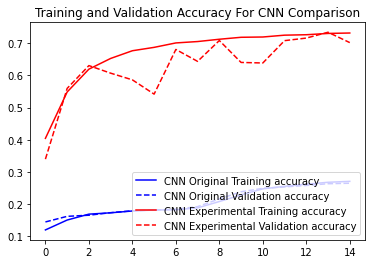

In [26]:
accuracy_cnn1 = history_cnn1.history['accuracy']
val_accuracy_cnn1 = history_cnn1.history['val_accuracy']
accuracy_cnn2 = history_cnn2.history['accuracy']
val_accuracy_cnn2 = history_cnn2.history['val_accuracy']
epochs = range(len(accuracy_cnn1))
plt.plot(epochs, accuracy_cnn1, 'b-', label='CNN Original Training accuracy')
plt.plot(epochs, val_accuracy_cnn1, 'b--', label='CNN Original Validation accuracy')
plt.plot(epochs, accuracy_cnn2, 'r-', label='CNN Experimental Training accuracy')
plt.plot(epochs, val_accuracy_cnn2, 'r--', label='CNN Experimental Validation accuracy')
plt.title('Training and Validation Accuracy For CNN Comparison')
plt.legend(loc='lower right')
plt.show()

In [27]:
indH, accuracy_cnn1 = model_cnn1.evaluate(xtest, ytest_1hot)
print('CNN Original Test Accuracy: ' + str(accuracy_cnn1))
indH, accuracy_cnn2 = model_cnn2.evaluate(xtest, ytest_1hot)
print('CNN Experimental Test Accuracy: ' + str(accuracy_cnn2))
print('CNN Experimental Accuracy Improvement vs MLP: ' + str(accuracy_cnn2) + " - " + str(accuracy_mlp1) + " = " + str(accuracy_cnn2-accuracy_mlp1))

313/313 [==============================] - 1s 2ms/step - loss: 1.9945 - accuracy: 0.2693
CNN Original Test Accuracy: 0.26930001378059387
313/313 [==============================] - 1s 2ms/step - loss: 1.0429 - accuracy: 0.6960
CNN Experimental Test Accuracy: 0.6959999799728394
CNN Experimental Accuracy Improvement vs MLP: 0.6959999799728394 - 0.4690999984741211 = 0.22689998149871826


## The Experimental CNN that was designed had a 22.7% improvement over the best MLP. 